## Customer Segmentation Analysis and Cluster Prediction with Machine Learning

In this project the aims to make a system/model that will be able to define the clusters of different shopping-mall customers.

We will use the ```mall_customers.csv``` dataset to progress with the project.

The project will be divided into various sections to completion including:

1. [Introduction(Library and Dataset importation)](#Introduction)
2. [Data Wrangling](#Wrangling)
3. [Exploratory Analysis](#Analysis)
4. [Modelling(Un-supervised and Supervised modelling)](#Modelling)
5. [Conclusion](#Conclusion)

### <a name="Introduction"></a> Introduction 

#### Library importation

There are various libraries that are going to be used in this analysis notebook:

1. ```Numpy``` - Performs a wide variety of mathematical operations on arrays. It adds powerful data structures to Python that guarantee efficient calculations with arrays and matrices
                and it supplies an enormous library of high-level mathematical functions that operate on these arrays and matrices.

2. ```Pandas``` - This is a Python library used for working with data sets. It has functions for analyzing, cleaning, exploring, manipulating data and also reading and writing csv/xls data

3. ```Matplotlib``` -  This is a popular Python library for data visualization and creating various types of graphs and charts. It is used to plot 2D and 3D figures, statistical data,   and scientific visualizations.

4. ```Seaborn``` -  This is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

5. ```Scikit``` -This is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Dataset Importation

The ```mall_customers.csv``` has the following features:

***CustomerID***: Unique ID assigned to the customer

***Gender***: Gender of the customer

***Age***: Age of the customer

***Annual Income (k$)***: Annual Income of the customer

***Spending Score (1-100)***: Score assigned by the mall based on customer behavior and spending nature.

In this particular dataset we have 200 samples to study.

In [2]:
dataset = pd.read_csv("Mall_Customers.csv")
df = dataset.copy()

In [3]:
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

### <a name="Wrangling"></a> Data Wrangling

In this section we will see how the data looks and prepare it for analysis and model building.

First, we check the datatype values of the dataframe.

From this ```.info()``` we see that the dataset is made up of 200. where 4 columns in the dataset are of type int64 while one is an object datatype.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


We then use the ```.describe()``` function to get further insights of the dataset such as the standard deviation, mean and min & max values

From this we, will know more about the data, whether or not we should have to use the standard scaler during model building

In [5]:
df.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

Then by using the ```.isnull()```, we find out whether there is any null values in the dataset so that we do some cleaning.

In [6]:
#Searching if the dataset has null values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

There being no null values in the dataset, means the dataset is ready for analysis and model building.

### <a name="Analysis"></a> Exploratory Analysis

In this section , we shall look into the data and gain insights between the relationship between the vatious features with each other

We will do this by plotting various graphs, piecharts, pairpots etc to fully understand this data.

To do so, we are only going to consider the following features: Annual Income (k$), Spending Score (1-100) and Age. Gender will only be used to make data sepparation so we can differentiate values for men and women.

To begin with, we are plotting the histograms for each of the three features we said we would look into:

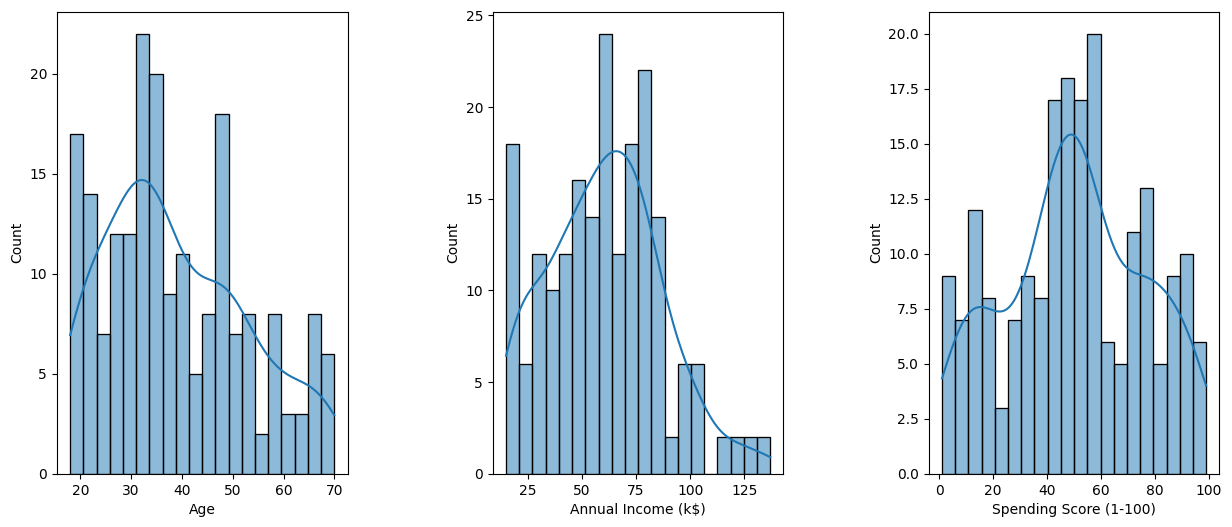

In [7]:
#Density estimation of values using histplot
#plt.title('Density Estmation')
plt.figure(1 , figsize = (15 , 6))
feature_list = ['Age','Annual Income (k$)', "Spending Score (1-100)"]
# feature_listt = ['Age','Annual Income (k$)', "Spending Score (1-100)"]
pos = 1 
for i in feature_list:
    plt.subplot(1 , 3 , pos)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.histplot(df[i], bins=20, kde = True)
    pos = pos + 1
plt.show()

From the histograms plotted, we can see that the distribution of these values resembles a Gaussian distribution, such that majority of the values lie in the middle with the fewer exeptions in the extremes.

We then look at the distribution of gender in the dataset and plot a corresponding representation to the distribution.

In [8]:
df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

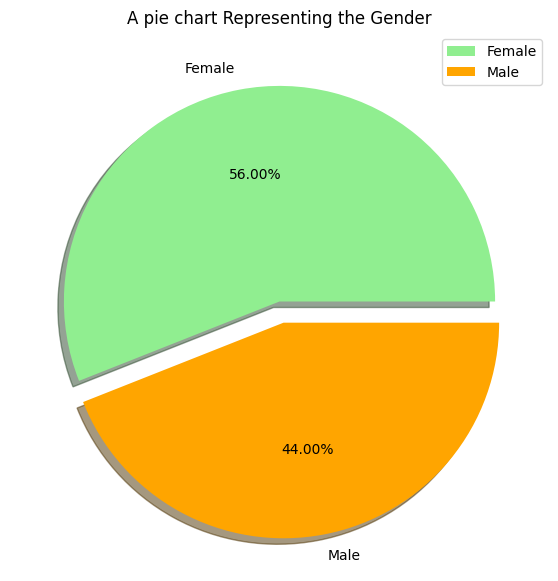

In [9]:
labels = ['Female', 'Male']
size = [112, 88]
colors = ['lightgreen', 'orange']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('A pie chart Representing the Gender')
plt.axis('off')
plt.legend()
plt.show()

Seaborn's ```.pairplot()```is a visualization technique that displays a matrix of scatter plots to summarize the relationships among variables in a dataset. It is a useful tool in exploratory data analysis to visually identify correlations, patterns, and outliers in the data.

Here, we will use it to visualize the relationship between and among all the features in the dataset

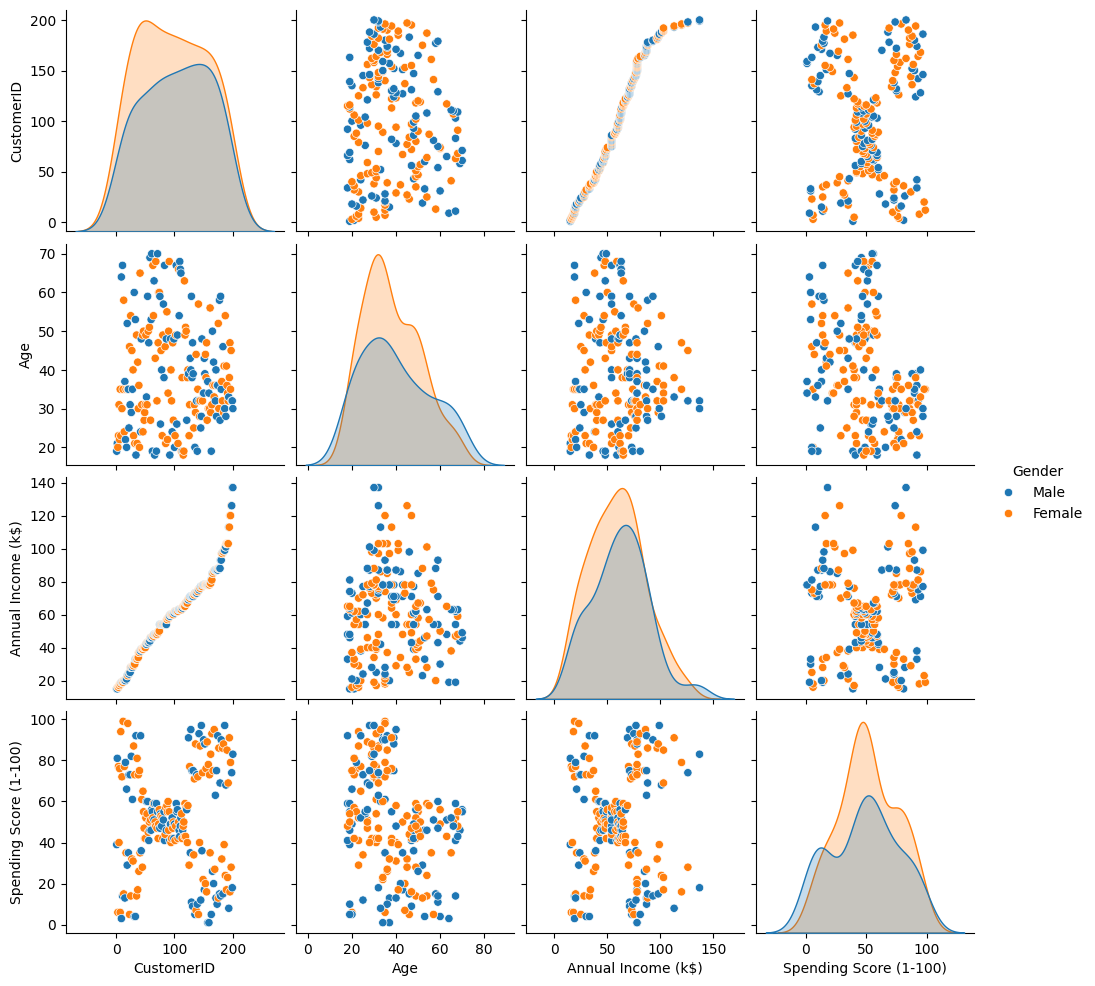

In [10]:
sns.pairplot(df, hue = 'Gender')

The ```.corr()``` function calculates the correlation matrix of the data. So, it creates a heatmap image of the correlation matrix. This heatmap can be helpful in visualizing the strength and direction of the linear relationships between different variables in the data.

In [11]:
# # Replacing objects for numerical values
# df['Gender'].replace(['Female','Male'], [0,1],inplace=True)
# # plt.matshow(df.corr())

In [12]:
# fig, axis = plt.subplots(figsize=(10, 8))
# corr = df.corr()
# sns.heatmap(corr, mask = np.zeros_like(corr, dtype = np.bool), cmap = sns.diverging_palette(220, 10, as_cmap = True),
#             square = True, ax = axis)

Now let's take a better look at some relations between these different variables and extract some important information before the clustering process takes place!

#### Age and Annual Income

In [13]:
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

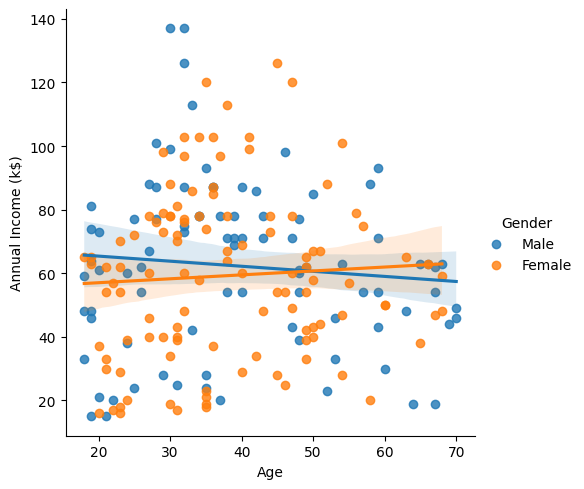

In [14]:
sns.lmplot(x = "Age", y = "Annual Income (k$)", data = df, hue = "Gender")

From this representation , we can see that the majority of the population in their thirties, fortys and fiftys tend to earn more money annually than the ones younger than thirty or older than fifty years old. That is to say people whose age lie between thirty and fifty years old seem to get better jobs since they might be better prepared or more experienced than younger or older population. In the graphic we can also see how males tend to earn a little bit more money than females, at least until fifty years old.

#### Spending Score and Annual Income

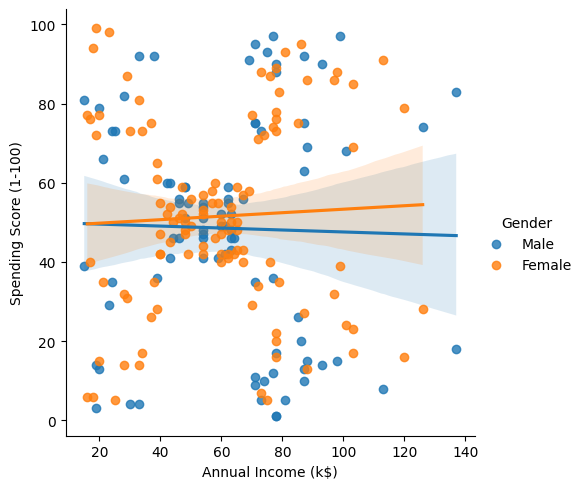

In [15]:
sns.lmplot(x = "Annual Income (k$)", y = "Spending Score (1-100)", data = df, hue = "Gender")

Here we can observe how a better annual income leads to having a higher spending score, specially for women. However the correlation between these two variables isn't that big, we seem to find the majority of people in the middle, people who have decent salaries and have a reasonably high spending score.

#### Age and Spending Score

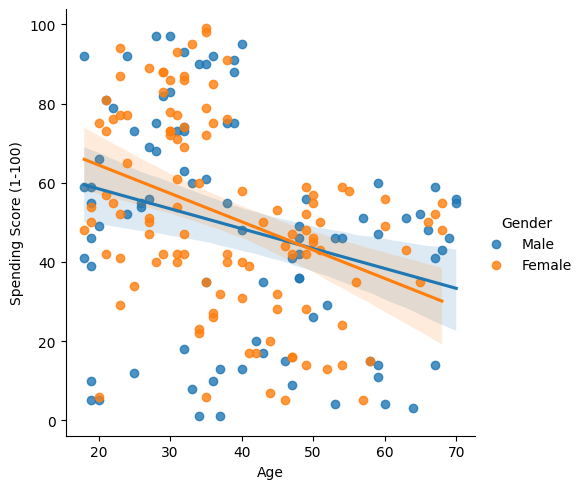

In [16]:
sns.lmplot(x = "Age", y = "Spending Score (1-100)", data = df, hue = "Gender")

In this last graphic we get to see something we could predict, young people tend to spend way more than older people. That can be due to many reasons: young people usually have more free time than old people, shopping malls tend to have shops that target young people such as videogames and tech stores, etc.

### <a name="Modelling"></a> Modelling(Un-supervised and Supervised modelling)

#### Unsupervised Learning

In [17]:
#Making  the independent variables matrices
X = df.iloc[:, [3, 4]].values 

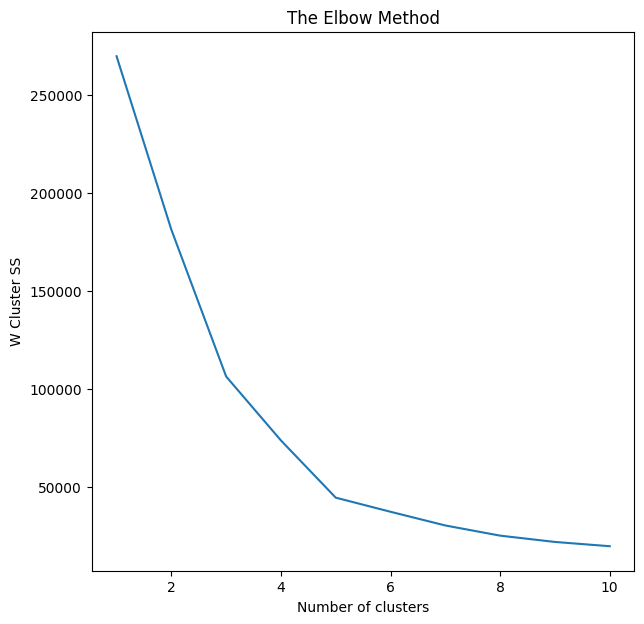

In [18]:
#Using KMeans for clustering
# Scale the features (important for K-means)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(X)


from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    df['Cluster'] = kmeans.fit_predict(features_scaled)





# font_title = {
#         'weight' : 'bold',
#         'size'   : 35}

# font_axes = {
#         'weight' : 'normal',
#         'size'   : 28}

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('W Cluster SS')
plt.show()

In [19]:
#Taking number of clusters = 5
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10)
y_kmeans = kmeans.fit_predict(X)
df['Cluster'] = kmeans.fit_predict(features_scaled)

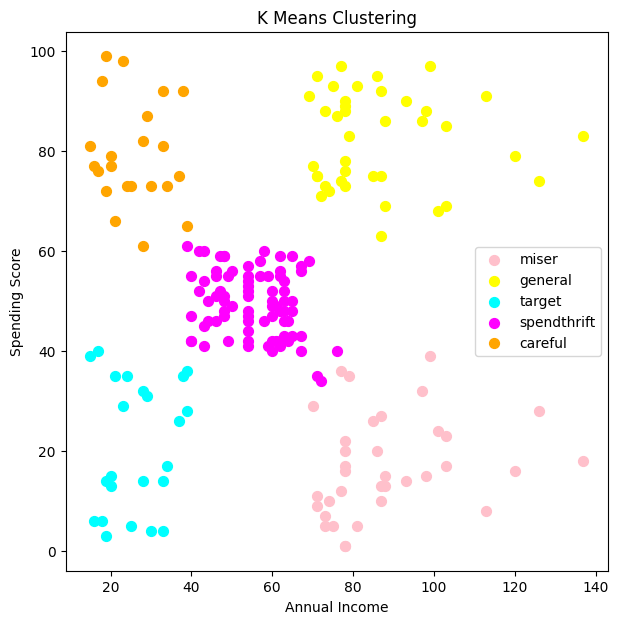

In [20]:
# PLotting the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'pink', label = 'miser')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'yellow', label = 'general')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'cyan', label = 'target')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = 'magenta', label = 'spendthrift')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 50, c = 'orange', label = 'careful')
#plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('K Means Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

## Supervised Learning

### Linear Regression to predict spending score

In [21]:
# Example using Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [22]:
# Assuming 'df' is your DataFrame with cluster labels
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
y = df['Cluster']

In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Create a linear regression model
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\Thorne\Desktop\Projects\csdraft\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
# Make predictions on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.925


In [26]:
# Evaluate the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.15


In [27]:
# Save the model using joblib
from joblib import dump

# Assuming 'model' is your trained Linear Regression model
dump(model, 'spending_score_model.joblib')

['spending_score_model.joblib']

In [28]:
# # Take user input for prediction
# user_age = int(input("Enter Age: "))
# user_annual_income = int(input("Enter Annual Income: "))
# user_gender = input("Enter Gender (Male/Female): ").capitalize()  # Convert to title case

# # Encode Gender as a numeric value (e.g., 1 for Male, 0 for Female)
# gender_encoding = 1 if user_gender == 'Male' else 0

# # Predict Spending Score using the trained model
# user_cluster = kmeans.predict([[user_annual_income, 0]])[0]  # Assuming user's Spending Score is unknown, set it to 0
# user_data = [[user_age, user_annual_income, gender_encoding]]
# predicted_spending_score = model.predict(user_data)[0]

# print(f"\nPredicted Spending Score: {predicted_spending_score}")

In [29]:
# from sklearn.metrics import accuracy_score
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Accuracy: {accuracy}')

In [30]:
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Assuming 'df' is your DataFrame with cluster labels
# Assuming 'model' is your trained Logistic Regression model

# Get user input for new customer features
new_age = float(input("Enter the customer's age: "))
new_annual_income = float(input("Enter the customer's annual income (k$): "))
new_spending_score = float(input("Enter the customer's spending score (1-100): "))

# Create a DataFrame with the user input
new_customer_features = pd.DataFrame({
    'Age': [new_age],
    'Annual Income (k$)': [new_annual_income],
    'Spending Score (1-100)': [new_spending_score]
})

# Make predictions for the new customer
predicted_cluster = model.predict(new_customer_features)

# Print the predicted cluster membership
print(f'Predicted Cluster Membership: {predicted_cluster[0]}')

# Recommendation system based on predicted cluster
if predicted_cluster[0] == 0:  # Miser
    recommendations = [
        "Explore our budget-friendly product selection.",
        "Join our loyalty program for exclusive discounts.",
        "Refer friends and earn additional rewards."
    ]

elif predicted_cluster[0] == 1:  # General
    recommendations = [
        "Discover a variety of products catering to different preferences.",
        "Check out our ongoing promotions for special deals.",
        "Share your feedback with us to help us improve."
    ]

elif predicted_cluster[0] == 2:  # Target
    recommendations = [
        "Explore our premium product range and personalized services.",
        "Consider joining our exclusive membership for additional perks.",
        "Enjoy VIP treatment as part of our customer loyalty program."
    ]

elif predicted_cluster[0] == 3:  # Spendthrift
    recommendations = [
        "Indulge in luxury items and unique experiences.",
        "Take advantage of limited-time offers to enhance your shopping experience.",
        "Receive personalized recommendations based on your preferences."
    ]

elif predicted_cluster[0] == 4:  # Careful
    recommendations = [
        "Discover cost-effective and durable product options.",
        "Benefit from discounts on essential items.",
        "Access informative content to make informed decisions."
    ]

# Print the recommendations
print("\nRecommendations:")
for recommendation in recommendations:
    print(f"- {recommendation}")


Enter the customer's age:  78
Enter the customer's annual income (k$):  4
Enter the customer's spending score (1-100):  90


Predicted Cluster Membership: 4

Recommendations:
- Discover cost-effective and durable product options.
- Benefit from discounts on essential items.
- Access informative content to make informed decisions.
